![](https://i.imgur.com/0AUxkXt.png)

# Assignment 3 - From data to insights
## Vương Tuấn Khanh
## 17110313


## Dataset - Online Retailes Purchase


### Step 1 - Checking the data

**Import tools set**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Import data**

In [0]:
# link = "https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv"
# Đọc file CSV và gán giá trị vào DataFrame Online_Retail, định dạng tham số kiểu encoding = 'latin1'
Online_Retail = pd.read_csv('https://ml101-khanhnguyen.s3-ap-southeast-1.amazonaws.com/devc/Online_Retail.csv', encoding = 'latin1')

In [3]:
# In ra 5 dòng đầu tiên của DataFrame
Online_Retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:
# In thông tin của Dataframe
Online_Retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Step 2 - Cleaning the data


**Check for NaN values**

In [5]:
# Kiểm tra các thuộc tính rỗng
# sum() là phương thức cho phép tổng hợp giá trị bị thiếu thành một list cho từng column
pd.isna(Online_Retail).sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Examine few examples of NaN values**

In [6]:
# Liệt kê một vài giá trị rỗng
# Phương thức isna() trả về giá trị NaN
# DataFrame.sample(n) trả về n sample ngẫu nhiên
Online_Retail[Online_Retail['CustomerID'].isna()].sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
329357,565841,85131D,BEADED CRYSTAL HEART PINK ON STICK,2,9/7/11 12:04,0.83,NaN,United Kingdom
537080,581238,21485,RETROSPOT HEART HOT WATER BOTTLE,1,12/8/11 10:53,7.46,NaN,United Kingdom
94909,544434,22138,BAKING SET 9 PIECE RETROSPOT,1,2/18/11 16:12,10.79,NaN,United Kingdom
47732,540418,20717,STRAWBERRY SHOPPER BAG,18,1/7/11 11:04,0.85,NaN,United Kingdom
81743,543172,22456,NATURAL SLATE CHALKBOARD LARGE,2,2/4/11 9:11,9.96,NaN,United Kingdom


**Exclude negative Quatity entries**

In [7]:
# Kiểm tra các giá trị Quantity âm có tồn tại không trước khi Exclude
Online_Retail[Online_Retail['Quantity'] < 0].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/10 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/10 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/10 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/10 10:24,0.29,17548.0,United Kingdom


In [8]:
# Xóa các hàng có giá trị âm
Online_Retail = Online_Retail[Online_Retail['Quantity'] >= 0]
# Kiểm tra lại
Online_Retail[Online_Retail['Quantity'] < 0].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


**Exclude negative Price entries**

In [9]:
# Kiểm tra các giá trị UnitPrice âm có tồn tại không trước khi Exclude
Online_Retail[Online_Retail['UnitPrice'] < 0].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,8/12/11 14:51,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,8/12/11 14:52,-11062.06,NaN,United Kingdom


In [10]:
# Xóa các hàng UnitPrice có giá trị âm
Online_Retail = Online_Retail[Online_Retail['UnitPrice'] >= 0]
# Kiểm tra lại
Online_Retail[Online_Retail['UnitPrice'] < 0].head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


### Step 3 - EDA

**The customer with the highest number of orders comes from the United Kingdom (UK)**

In [11]:
# Tạo ra một DataFrame UK chứa tất cả các customer có Country là UK
UK = Online_Retail[Online_Retail['Country'] == 'United Kingdom']
# Kiểm tra
UK.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
102693,545029,22483,RED GINGHAM TEDDY BEAR,15,2/25/11 15:27,2.95,14541.0,United Kingdom
445945,574864,23536,WALL ART VILLAGE SHOW,2,11/7/11 12:29,5.95,14387.0,United Kingdom
238116,557898,21833,CAMOUFLAGE LED TORCH,12,6/23/11 14:35,1.69,17314.0,United Kingdom
259099,559687,21495,SKULLS AND CROSSBONES WRAP,50,7/11/11 15:28,0.42,17966.0,United Kingdom
325666,565450,21829,DINOSAUR KEYRINGS ASSORTED,36,9/4/11 15:22,0.21,17722.0,United Kingdom


In [12]:
# Nhóm bảng UK theo CustomerID và gán vào Dataframe temp_UK, sắp xếp giảm dần
temp_UK = pd.value_counts(UK['CustomerID'],sort=True)
# Lấy ra CustomerID có số lượng Order lớn nhất
temp_UK.head(1)

17841.0    7847
Name: CustomerID, dtype: int64

**The customer with the highest money spent on purchases comes from Netherlands**

In [13]:
# Tạo ra một DataFrame Netherland chứa tất cả các customer có Country là Netherlands
Netherland = Online_Retail[Online_Retail['Country'] == 'Netherlands']
# Kiểm tra
Netherland.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
404858,571697,23007,SPACEBOY BABY GIFT SET,2,10/18/11 14:49,16.95,12759.0,Netherlands
234451,557525,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,6/21/11 9:26,2.95,12759.0,Netherlands
347043,567280,22630,DOLLY GIRL LUNCH BOX,192,9/19/11 11:46,1.65,14646.0,Netherlands
66110,541711,21424,WOODLAND STORAGE BOX LARGE,24,1/21/11 11:18,2.55,14646.0,Netherlands
421598,573002,23382,BOX OF 6 CHRISTMAS CAKE DECORATIONS,36,10/27/11 12:09,3.29,14646.0,Netherlands


In [15]:
# Tạo cột ghi số tiền chi ra cho mỗi Order
Netherland['Total'] = Netherland['UnitPrice']*Netherland['Quantity']
# Kiểm tra
Netherland.sample(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
314718,564650,22846,BREAD BIN DINER STYLE RED,8,8/26/11 14:17,14.95,14646.0,Netherlands,119.60
299038,563076,21122,SET/10 PINK POLKADOT PARTY CANDLES,288,8/11/11 16:12,1.06,14646.0,Netherlands,305.28
57426,541206,84992,72 SWEETHEART FAIRY CAKE CASES,120,1/14/11 12:24,0.42,14646.0,Netherlands,50.40
534909,581175,22905,CALENDAR IN SEASON DESIGN,40,12/7/11 15:16,1.25,14646.0,Netherlands,50.00
214588,555589,21789,KIDS RAIN MAC PINK,24,6/6/11 9:36,0.85,12802.0,Netherlands,20.40
40237,539731,22629,SPACEBOY LUNCH BOX,128,12/21/10 15:05,1.65,14646.0,Netherlands,211.20
298965,563076,21731,RED TOADSTOOL LED NIGHT LIGHT,288,8/11/11 16:12,1.45,14646.0,Netherlands,417.60
40203,539731,22472,TV DINNER TRAY DOLLY GIRL,16,12/21/10 15:05,4.25,14646.0,Netherlands,68.00
137028,548011,22631,CIRCUS PARADE LUNCH BOX,128,3/29/11 11:14,1.65,14646.0,Netherlands,211.20
491948,578082,23487,SWEET HEART CAKE CARRIER,2,11/22/11 16:33,9.95,12775.0,Netherlands,19.90


In [16]:
# Tạo Dataframe mới bằng cách gộp các giá trị của Total và tính sum()
Revenue = Netherland.groupby(['CustomerID']).sum()
# Kiểm tra
Revenue.sample(5)

,Quantity,UnitPrice,Total
CustomerID,,,
12778.0,825,175.47,822.23
12790.0,166,82.92,324.92
12791.0,97,16.85,192.60
12759.0,902,305.47,1531.44
12789.0,4,91.85,91.85


In [17]:
# Customer tiêu nhiều nhất
temp_Neth = Revenue[Revenue['Total'] == Revenue['Total'].max()]
temp_Neth

,Quantity,UnitPrice,Total
CustomerID,,,
14646.0,197491,5176.09,280206.02


In [19]:
# Kiểm tra giá trị
Revenue['Total'].max()

280206.01999999984

**On which year had the highest sales?**

In [0]:
# Hàm lấy ra năm theo tham số a
def take_year(a):
  b = a.split(' ')
  c = b[0].split('/')
  return c[2]

In [21]:
# Tạo một list Year trong đó đã Parse ra năm theo cấu trúc của InvoiceDate
Year = [take_year(i) for i in Online_Retail['InvoiceDate']]
# Tạo một cột Year mới cho Dataframe
Online_Retail['Year'] = Year
# Kiểm tra
Online_Retail.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year
185284,552803,15034,PAPER POCKET TRAVELING FAN,12,5/11/11 12:32,0.14,14573.0,United Kingdom,11
225162,556636,23082,SET 6 PAPER TABLE LANTERN HEARTS,3,6/13/11 15:30,7.46,NaN,United Kingdom,11
257830,559545,22152,PLACE SETTING WHITE STAR,24,7/10/11 14:42,0.42,15467.0,United Kingdom,11
418051,572682,72802C,VANILLA SCENT CANDLE JEWELLED BOX,1,10/25/11 13:52,4.25,17928.0,United Kingdom,11
472983,576778,22489,PACK OF 12 TRADITIONAL CRAYONS,3,11/16/11 13:24,0.42,16085.0,United Kingdom,11


In [22]:
# Tạo cột doanh thu
Online_Retail['Total'] = Online_Retail['UnitPrice']*Online_Retail['Quantity']
# Kiểm tra
Online_Retail.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Total
475580,576905,82482,WOODEN PICTURE FRAME WHITE FINISH,6,11/17/11 9:31,2.95,13308.0,United Kingdom,11,17.70
111785,545830,21169,YOU'RE CONFUSING ME METAL SIGN,2,3/7/11 13:10,1.69,17634.0,United Kingdom,11,3.38
297058,562933,72807B,SET/3 OCEAN SCENT CANDLE JEWEL BOX,1,8/10/11 16:51,8.29,NaN,United Kingdom,11,8.29
72987,542276,82600,NO SINGING METAL SIGN,12,1/27/11 10:19,2.10,12764.0,Lebanon,11,25.20
321746,565200,20866,BLUE ROSE FABRIC MIRROR,5,9/1/11 16:30,1.25,17576.0,United Kingdom,11,6.25


In [23]:
# Tạo Dataframe mới bằng cách gộp các giá trị của Total và tính sum()
Sale = Online_Retail.groupby(['Year']).sum()
# Biến temp_Year chính là năm có Total lớn nhất
temp_Year = Sale[Sale['Total'] == Sale['Total'].max()]
temp_Year

,Quantity,UnitPrice,CustomerID,Total
Year,,,,
11,5298663,1.871543e+06,5.679734e+09,9.842938e+06


In [24]:
# Kiểm tra
Sale['Total'].max()

9842938.404003019

**How many orders (per hour)?**

In [0]:
# Hàm lấy ra giờ theo tham số a
def take_hour(a):
  b = a.split(' ')
  c=b[1].split(':')
  return c[0]

In [49]:
# Tạo một list Hour trong đó đã Parse ra năm theo cấu trúc của InvoiceDate
Hour = [take_hour(i) for i in Online_Retail['InvoiceDate']]
# Tạo một cột Hour mới cho Dataframe
Online_Retail['Hour'] = Hour
# Kiểm tra
Online_Retail.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Total,Hour,Month
142957,548659,22979,PANTRY WASHING UP BRUSH,12,4/1/11 14:19,1.45,13418.0,United Kingdom,11,17.40,14,4
517247,580048,23579,SNACK TRAY I LOVE LONDON,1,12/1/11 12:53,1.95,12748.0,United Kingdom,11,1.95,12,12
353124,567742,23107,WHITE HEARTS WIRE PLANT POT HOLDER,8,9/22/11 10:47,2.89,14261.0,United Kingdom,11,23.12,10,9
340561,566673,21136,PAINTED METAL PEARS ASSORTED,8,9/14/11 11:39,1.69,17728.0,United Kingdom,11,13.52,11,9
6957,536982,84997b,RED 3 PIECE RETROSPOT CUTLERY SET,10,12/3/10 14:27,8.47,NaN,United Kingdom,10,84.70,14,12


In [28]:
# Đếm số lượng Hour, số lượng Hour chính là số lượng đơn hàng
temp_Hour = Online_Retail['Hour'].value_counts()
# Phân tử đầu tiên là phần tử xuất hiện nhiều nhất => Thời gian có nhiều đơn hàng nhất
temp_Hour.head(1)

12    77230
Name: Hour, dtype: int64

In [29]:
# Đặt tên Series
temp = pd.Series(temp_Hour, name="Order per Hour")
# Label cho Series
df = pd.DataFrame({'Hour':temp.index, 'Order':temp.values})
# Xuất bảng
df

,Hour,Order
0,12,77230
1,15,76432
2,13,71075
3,14,66266
4,11,56312
5,16,53451
6,10,47895
7,9,33755
8,17,27635
9,8,8805


**Make a plot about number of orders per hour**

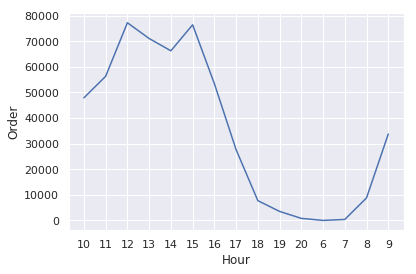

In [39]:
# Tạo lineplot
sns.lineplot(x=df['Hour'],y=df['Order'],data=df)
# Xuất bảng
plt.show()

**How many orders (per month)?**

In [0]:
# Hàm lấy ra tháng theo tham số a
def take_month(a):
  b = a.split(' ')
  c=b[0].split('/')
  return c[0]

In [47]:
# Tạo một list Month trong đó đã Parse ra tháng theo cấu trúc của InvoiceDate
Month = [take_month(i) for i in Online_Retail['InvoiceDate']]
# Tạo một cột Month mới cho Dataframe
Online_Retail['Month'] = Month
# Kiểm tra
Online_Retail.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Total,Hour,Month
239096,557974,22483,RED GINGHAM TEDDY BEAR,24,6/24/11 10:31,2.55,14541.0,United Kingdom,11,61.20,10,6
310637,564191,22961,JAM MAKING SET PRINTED,1,8/23/11 16:16,1.45,17315.0,United Kingdom,11,1.45,16,8
445096,574756,23301,GARDENERS KNEELING PAD KEEP CALM,12,11/7/11 9:40,1.65,13534.0,United Kingdom,11,19.80,9,11
133732,547793,22796,PHOTO FRAME 3 CLASSIC HANGING,4,3/25/11 12:10,9.95,14758.0,United Kingdom,11,39.80,12,3
371436,569220,20719,WOODLAND CHARLOTTE BAG,1,10/2/11 13:26,0.85,16007.0,United Kingdom,11,0.85,13,10


In [44]:
# Đếm số lượng Month, số lượng Month chính là số lượng đơn hàng
temp_Month = Online_Retail['Month'].value_counts()
# Phân tử đầu tiên là phần tử xuất hiện nhiều nhất => Thời gian có nhiều đơn hàng nhất
temp_Month.head(1)

11    83498
Name: Month, dtype: int64

In [50]:
# Đặt tên Series
temp_1 = pd.Series(temp_Month, name="Order per Month")
# Label cho Series
df_1 = pd.DataFrame({'Month':temp_Month.index, 'Order':temp_Month.values})
# Xuất bảng
df_1

,Month,Order
0,11,83498
1,12,66818
2,10,59396
3,9,49323
4,7,38716
5,5,36292
6,6,36056
7,3,35915
8,8,34564
9,1,34350


**Make a plot about number of orders per month**

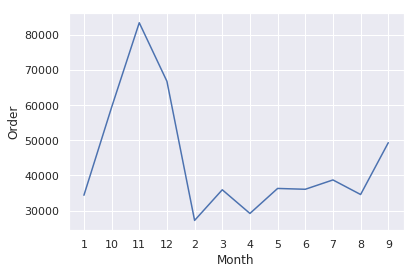

In [51]:
# Tạo lineplot
sns.lineplot(x=df_1['Month'],y=df_1['Order'],data=df_1)
# Xuất bảng
plt.show()

**Top 10 items most sales**

In [55]:
# Tạo ra danh sách Item và sắp xếp thứ tự giảm dần
Top_Item = Online_Retail['Description'].value_counts(sort=True)
# Lấy ra 10 Item đầu tiên
Top_Item.head(10)

WHITE HANGING HEART T-LIGHT HOLDER    2327
JUMBO BAG RED RETROSPOT               2115
REGENCY CAKESTAND 3 TIER              2019
PARTY BUNTING                         1707
LUNCH BAG RED RETROSPOT               1594
ASSORTED COLOUR BIRD ORNAMENT         1489
SET OF 3 CAKE TINS PANTRY DESIGN      1399
PACK OF 72 RETROSPOT CAKE CASES       1370
LUNCH BAG  BLACK SKULL.               1328
NATURAL SLATE HEART CHALKBOARD        1263
Name: Description, dtype: int64

**Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK**

In [56]:
# Tạo Dataframe của các nước khác UK
Except_UK = Online_Retail[Online_Retail['Country']!='United Kingdom']
# Kiểm tra
Except_UK.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Total,Hour,Month
488934,577856,23445,ICE CREAM BUBBLES,20,11/22/11 11:19,0.83,12490.0,France,11,16.60,11,11
531776,580965,22915,ASSORTED BOTTLE TOP MAGNETS,12,12/6/11 14:52,0.42,12417.0,Belgium,11,5.04,14,12
63101,541520,20713,JUMBO BAG OWLS,10,1/19/11 9:13,1.95,12422.0,Australia,11,19.50,9,1
459839,575884,23058,CHRISTMAS HANGING SNOWFLAKE,12,11/11/11 13:46,0.79,12685.0,France,11,9.48,13,11
181315,552464,21122,SET/10 PINK POLKADOT PARTY CANDLES,24,5/9/11 15:12,1.25,12726.0,France,11,30.00,15,5


In [80]:
# Tạo Dataframe gồm Country và Quantity
temp = Except_UK[['Country','Quantity']]
# Kiểm tra
temp.sample(5)

,Country,Quantity
418006,Portugal,2
186069,Germany,18
116305,Cyprus,12
180548,France,20
518830,France,8


In [81]:
# Gộp Quantity theo Country sắp xếp theo thứ tự giảm dần
Sorted = temp['Country'].value_counts()
# 10 Country đầu tiên sẽ có Quantity cao nhất
Sorted.head(10)

Germany        9042
France         8408
EIRE           7894
Spain          2485
Netherlands    2363
Belgium        2031
Switzerland    1967
Portugal       1501
Australia      1185
Norway         1072
Name: Country, dtype: int64

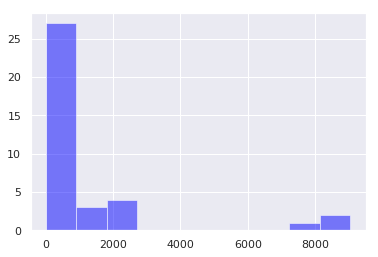

In [85]:
# Vẽ histogram
plt.hist(Sorted.values, facecolor='blue', alpha=0.5)
# Show bảng
plt.show()

### You are awesome!!